# HW 2 Machine Learning
### Linear and multiple regressions.
#### Sep 16th, 2022
#### William Lu
#### WilliamLu1999
#### 7424831487


##### (a) & (b) i Process and explore the data

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
%matplotlib inline
import statsmodels.api as sm
from sklearn.preprocessing import StandardScaler

In [2]:
df = pd.read_excel('../data/CCPP/Folds5x2_pp.xlsx',sheet_name=1)
df

,AT,V,AP,RH,PE
0,9.59,38.56,1017.01,60.10,481.30
1,12.04,42.34,1019.72,94.67,465.36
2,13.87,45.08,1024.42,81.69,465.48
3,13.72,54.30,1017.89,79.08,467.05
4,15.14,49.64,1023.78,75.00,463.58
...,...,...,...,...,...
9563,17.10,49.69,1005.53,81.82,457.32
9564,24.73,65.34,1015.42,52.80,446.92
9565,30.44,56.24,1005.19,56.24,429.34
9566,23.00,66.05,1020.61,80.29,421.57


There are 9568 rows and 5 columns (excluding index) in the table. Each column represents Average Temperature (AT), Exhuast Vacuum (V), Ambient Pressure (AP), Relative Humidity (RH), and Electrical Energy Output (EP) respectively.

##### b(ii) Visualize the data

Text(0.5, 1.05, 'Relationship Between Variables')

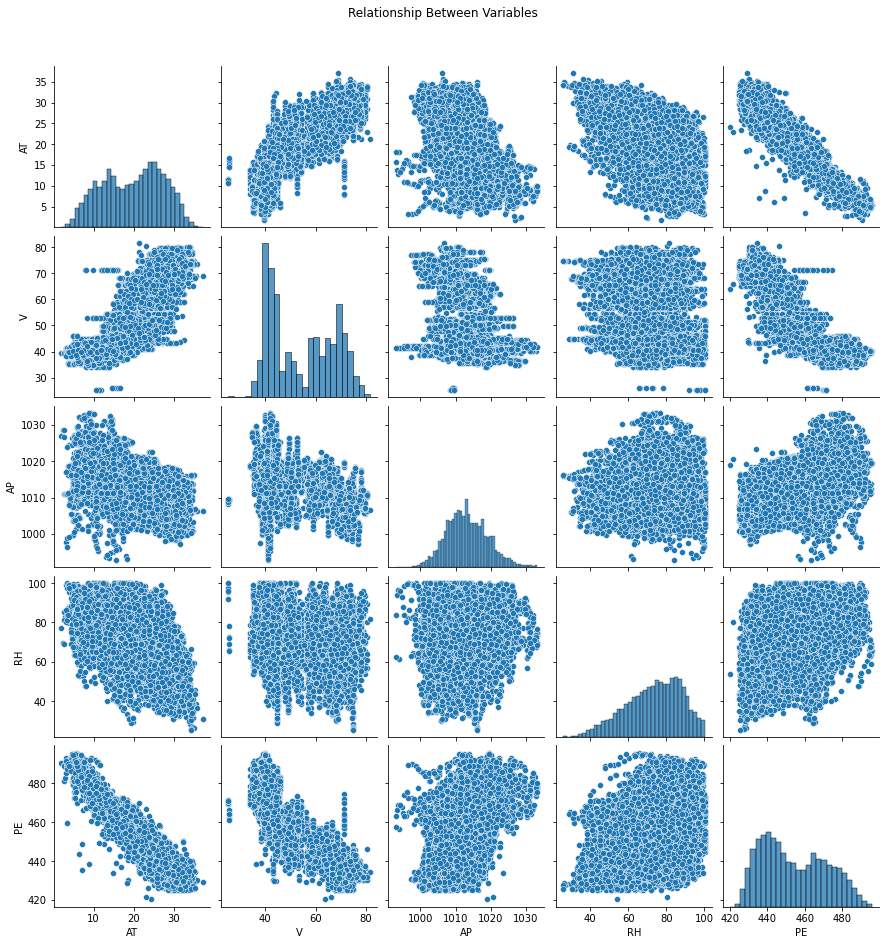

In [3]:
independent_pair = sns.pairplot(df,vars=['AT','V','AP','RH','PE'])
independent_pair.fig.suptitle('Relationship Between Variables',y=1.05)

Findings: 
1. AT has a positive correlation with V and a negative correlation with PE.
2. AP has an almost normal distribution.
3. AP seems to have a weak negative correlation with V and AT.
4. RH with respect to V, AP, PE does not have clear correlations. 
5. V has a negative correlation with PE.
6. RH has a skewd to left distribution.

#### (b) iii Summary statistics of each variable

In [4]:
df_description = df.describe()
# We need to set the index so that we can do subtraction on the dataframe
df_description = pd.DataFrame(data=df_description, index=['count', 'mean','std','min','25%','50%','75%','max'])
df_description.loc['range']=df_description.loc['max']-df_description.loc['min']
df_description.loc['inter-quartiles-range']= df_description.loc['75%']-df_description.loc['25%']
df_description.loc['first-quartile-range']= df_description.loc['25%']-df_description.loc['min']
df_description.loc['third-quartile-range']= df_description.loc['75%']-df_description.loc['50%']
df_description.loc['median']=df_description.loc['50%']
df_description

,AT,V,AP,RH,PE
count,9568.000000,9568.000000,9568.000000,9568.000000,9568.000000
mean,19.651231,54.305804,1013.259078,73.308978,454.365009
std,7.452473,12.707893,5.938784,14.600269,17.066995
min,1.810000,25.360000,992.890000,25.560000,420.260000
25%,13.510000,41.740000,1009.100000,63.327500,439.750000
50%,20.345000,52.080000,1012.940000,74.975000,451.550000
75%,25.720000,66.540000,1017.260000,84.830000,468.430000
max,37.110000,81.560000,1033.300000,100.160000,495.760000
range,35.300000,56.200000,40.410000,74.600000,75.500000
inter-quartiles-range,12.210000,24.800000,8.160000,21.502500,28.680000


#### (c) Linear Regression

In [5]:
# Train the linear regression model using all data
# For predictor AT
X_train_AT=df.iloc[:,0:1]
y_train=df.iloc[:,-1]
sc_X = StandardScaler()
X_train_AT2= sc_X.fit_transform(X_train_AT)
regressor_AT = LinearRegression()
regressor_AT.fit(X_train_AT2,y_train)
print(regressor_AT.coef_)
print(regressor_AT.intercept_)

[-16.18085823]
454.36500940635455


In [6]:
#X_train_AT2 = sm.add_constant(X_train_AT2)
model1 = sm.OLS(y_train,X_train_AT2).fit()
print(model1.summary())

                                 OLS Regression Results                                
Dep. Variable:                     PE   R-squared (uncentered):                   0.001
Model:                            OLS   Adj. R-squared (uncentered):              0.001
Method:                 Least Squares   F-statistic:                              12.13
Date:                Thu, 22 Sep 2022   Prob (F-statistic):                    0.000498
Time:                        17:37:14   Log-Likelihood:                         -72123.
No. Observations:                9568   AIC:                                  1.442e+05
Df Residuals:                    9567   BIC:                                  1.443e+05
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

This P>|t| =0 shows that there is a statistically significant relation between average termperature and Electrical Energy Output.

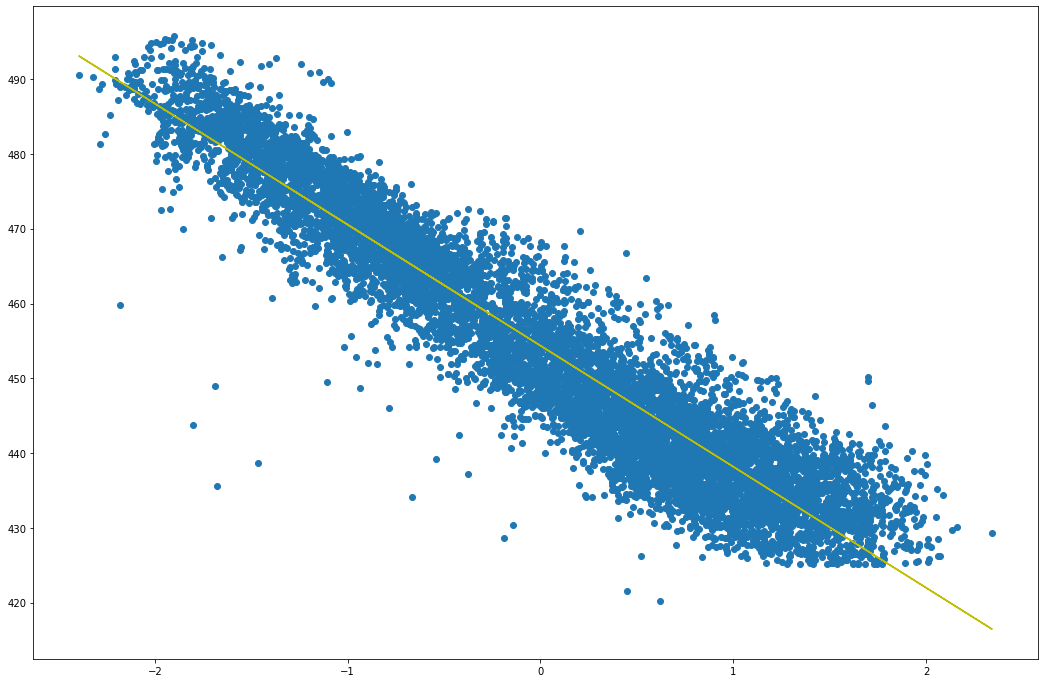

In [7]:
plt.figure(figsize=(18,12))
plt.scatter(X_train_AT2,y_train)
plt.plot(X_train_AT2, regressor_AT.predict(X_train_AT2),color='y')
plt.show()

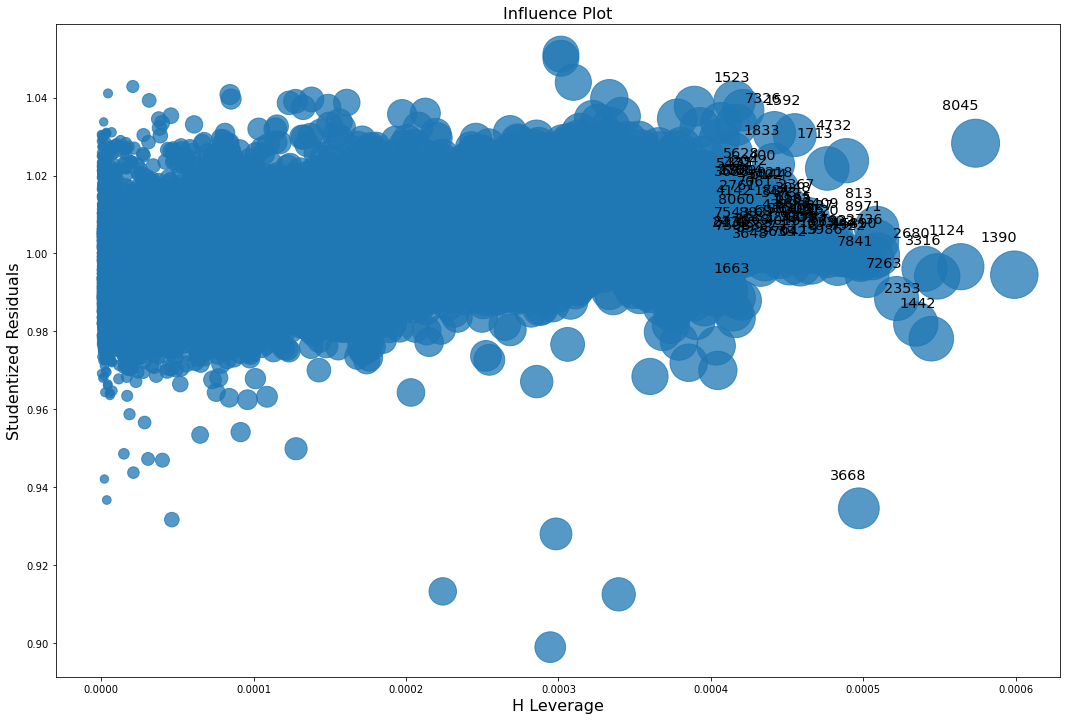

In [8]:
plt.rc("figure", figsize=(18,12))
sm.graphics.influence_plot(model1,criterion='cooks')
plt.show()

Above dots that are big could be some outlier points I want to remove.

In [9]:
# For predictor V, y_train is still the same
X_train_V=df.iloc[:,1:2]
X_train_V2 = sc_X.fit_transform(X_train_V)
regressor_V = LinearRegression()
regressor_V.fit(X_train_V2,y_train)
print(regressor_V.coef_)
print(regressor_V.intercept_)

[-14.84376044]
454.36500940635455


In [10]:
model2 = sm.OLS(y_train,X_train_V2).fit()
print(model2.summary())

                                 OLS Regression Results                                
Dep. Variable:                     PE   R-squared (uncentered):                   0.001
Model:                            OLS   Adj. R-squared (uncentered):              0.001
Method:                 Least Squares   F-statistic:                              10.21
Date:                Thu, 22 Sep 2022   Prob (F-statistic):                     0.00140
Time:                        17:37:24   Log-Likelihood:                         -72124.
No. Observations:                9568   AIC:                                  1.442e+05
Df Residuals:                    9567   BIC:                                  1.443e+05
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

This P>|t| =0.001 shows that there is a statistically significant relation between Exhuast Vacuum and Electrical Energy Output.

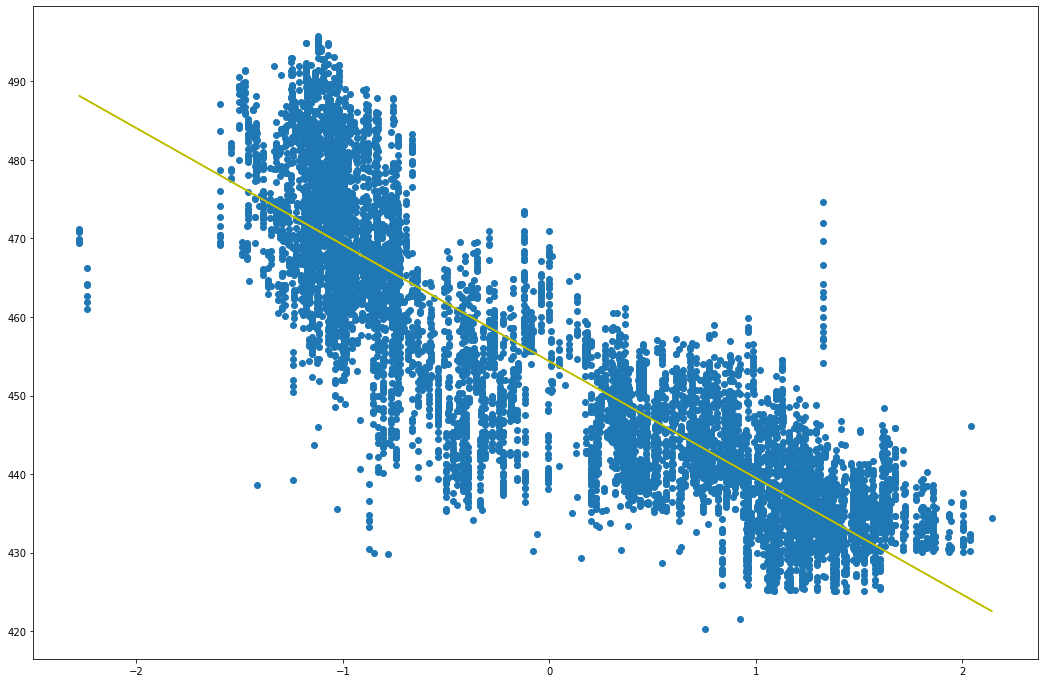

In [11]:
plt.figure(figsize=(18,12))
plt.scatter(X_train_V2, y_train)
plt.plot(X_train_V2, regressor_V.predict(X_train_V2),color='y')
plt.show()

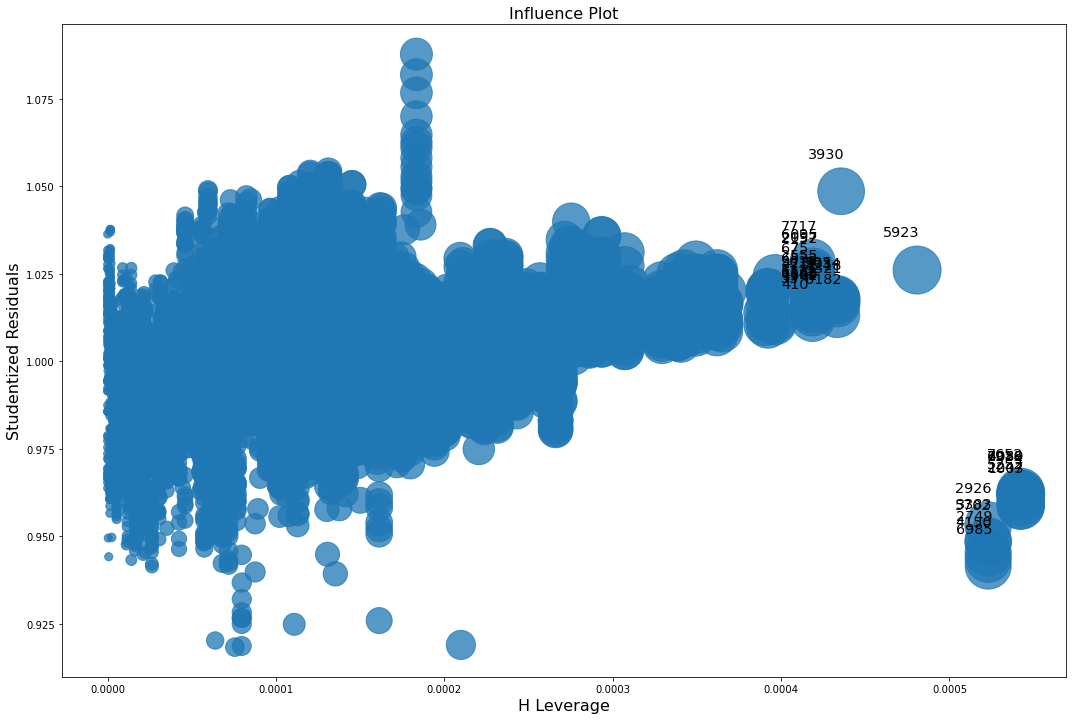

In [12]:
plt.rc("figure", figsize=(18,12))
sm.graphics.influence_plot(model2,criterion='cooks')
plt.show()

Some data points on the right (in a straight line) and on the very left I may want to remove.

In [13]:
# For predictor AP, y_train is still the same
X_train_AP=df.iloc[:,2:3]
X_train_AP2 = sc_X.fit_transform(X_train_AP)
regressor_AP = LinearRegression()
regressor_AP.fit(X_train_AP2,y_train)
print(regressor_AP.coef_)
print(regressor_AP.intercept_)

[8.84756323]
454.3650094063545


In [14]:
model3 = sm.OLS(y_train,X_train_AP2).fit()
print(model3.summary())

                                 OLS Regression Results                                
Dep. Variable:                     PE   R-squared (uncentered):                   0.000
Model:                            OLS   Adj. R-squared (uncentered):              0.000
Method:                 Least Squares   F-statistic:                              3.624
Date:                Thu, 22 Sep 2022   Prob (F-statistic):                      0.0570
Time:                        17:37:33   Log-Likelihood:                         -72127.
No. Observations:                9568   AIC:                                  1.443e+05
Df Residuals:                    9567   BIC:                                  1.443e+05
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

This P>|t| =0.057 shows that there is not a statistically significant relation between Ambient Pressure and Electrical Energy Output.

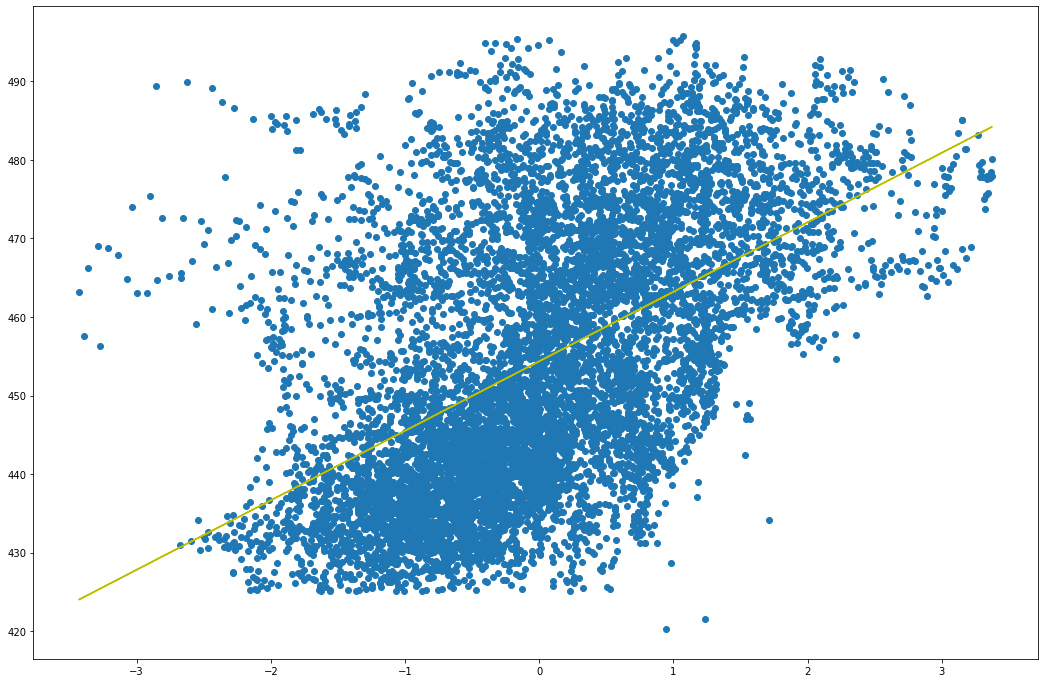

In [15]:
plt.figure(figsize=(18,12))
plt.scatter(X_train_AP2, y_train)
plt.plot(X_train_AP2, regressor_AP.predict(X_train_AP2),color='y')
plt.show()

Many data points on the left corner may be outliers that I want to remove.

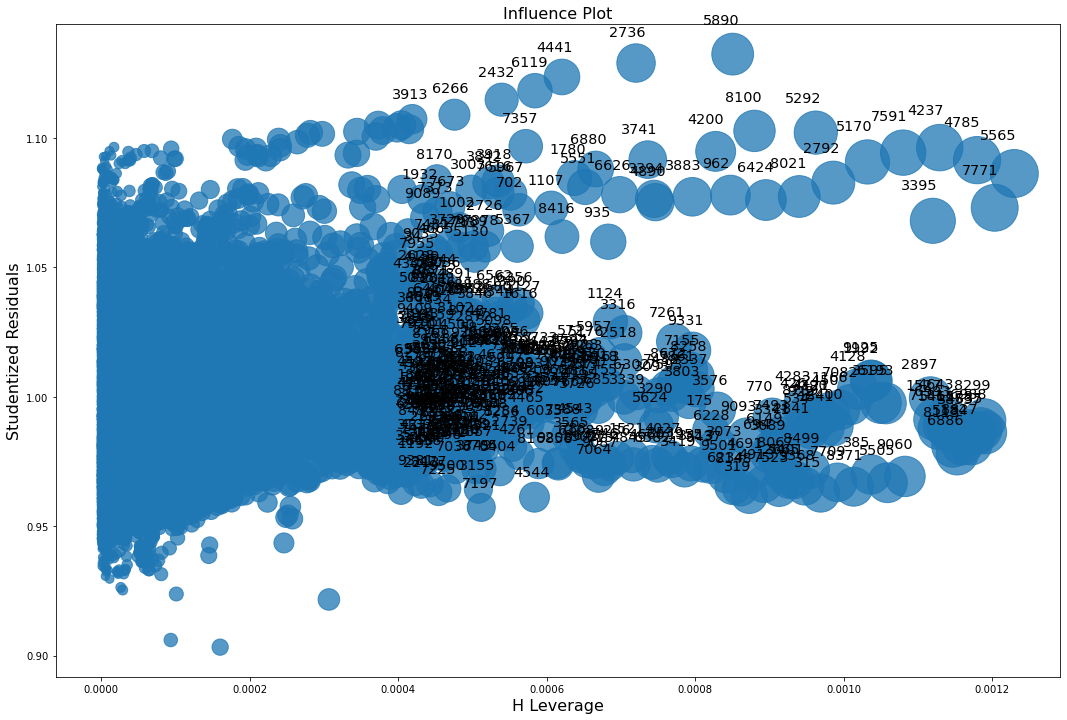

In [16]:
plt.rc("figure", figsize=(18,12))
sm.graphics.influence_plot(model3,criterion='cooks')
plt.show()

In [17]:
# For predictor RH, y_train is still the same
X_train_RH=df.iloc[:,1:2]
X_train_RH2 = sc_X.fit_transform(X_train_RH)
regressor_RH = LinearRegression()
regressor_RH.fit(X_train_RH2,y_train)
print(regressor_RH.coef_)
print(regressor_RH.intercept_)

[-14.84376044]
454.36500940635455


In [18]:
model4 = sm.OLS(y_train,X_train_RH2).fit()
print(model4.summary())

                                 OLS Regression Results                                
Dep. Variable:                     PE   R-squared (uncentered):                   0.001
Model:                            OLS   Adj. R-squared (uncentered):              0.001
Method:                 Least Squares   F-statistic:                              10.21
Date:                Thu, 22 Sep 2022   Prob (F-statistic):                     0.00140
Time:                        17:37:45   Log-Likelihood:                         -72124.
No. Observations:                9568   AIC:                                  1.442e+05
Df Residuals:                    9567   BIC:                                  1.443e+05
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

This P>|t| =0.001 shows that there is a statistically significant relation between Relative Humidity and Electrical Energy Output.

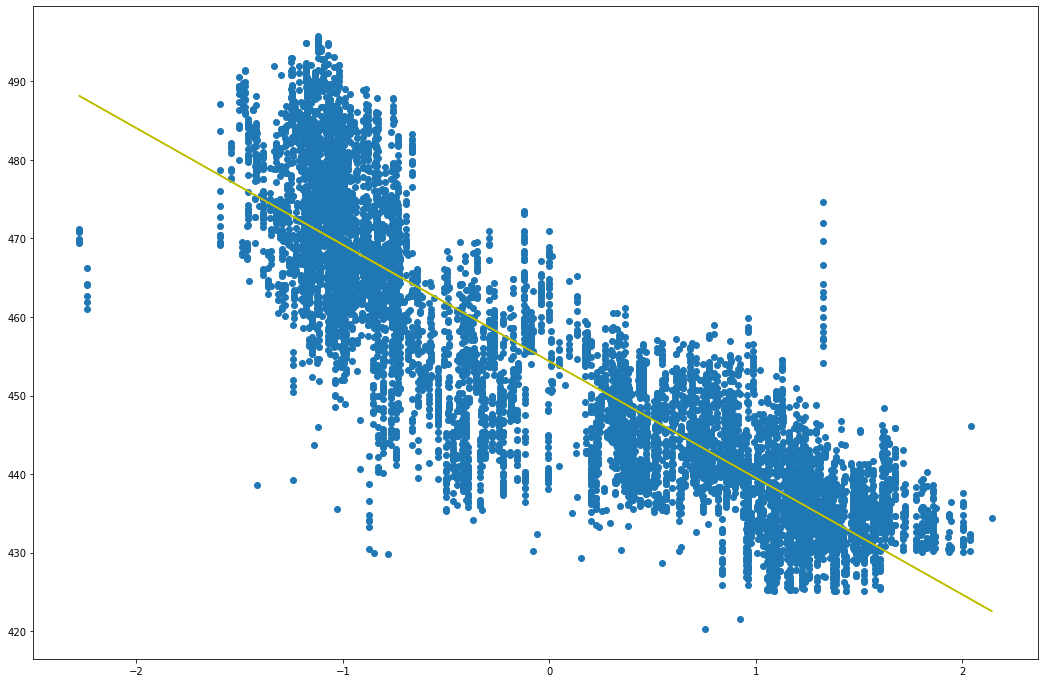

In [19]:
plt.figure(figsize=(18,12))
plt.scatter(X_train_RH2, y_train)
plt.plot(X_train_RH2, regressor_RH.predict(X_train_RH2),color='y')
plt.show()

Points, for instance, on a straight line on the right, could be outliers that I would like to remove them.

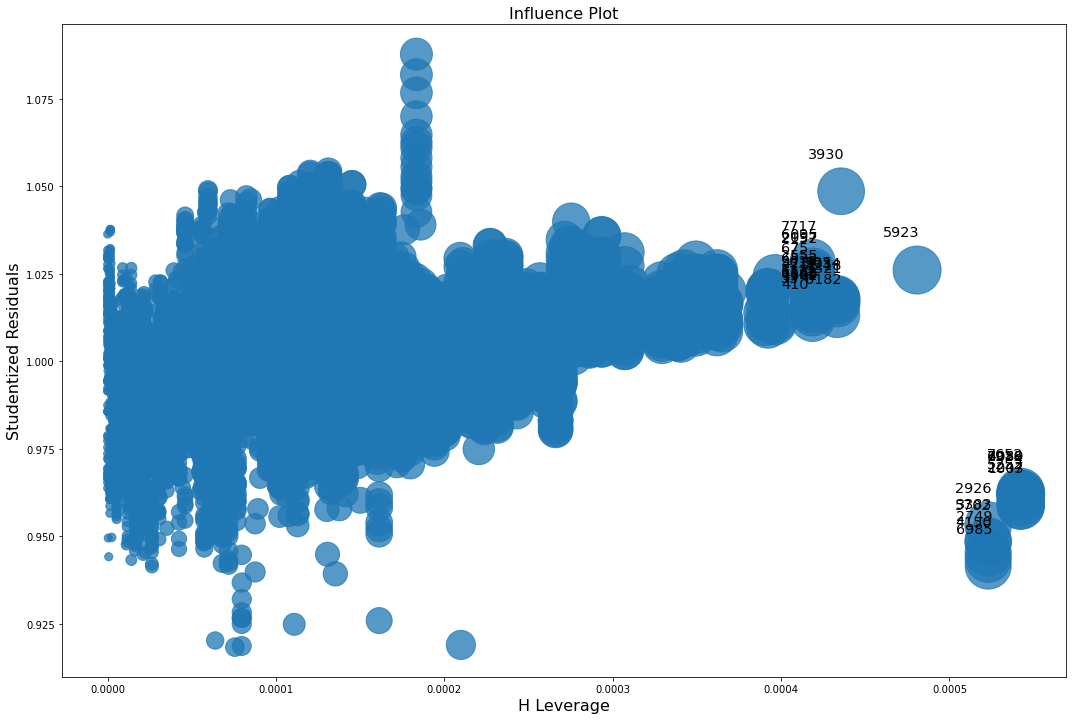

In [20]:
plt.rc("figure", figsize=(18,12))
sm.graphics.influence_plot(model4,criterion='cooks')
plt.show()

#### (d) Multiple Linear Regressions

In [21]:
X_train = df.iloc[:,0:4]
X_train2 = sc_X.fit_transform(X_train)
multiple_l_regression = LinearRegression()
multiple_l_regression.fit(X_train2,y_train)
print(multiple_l_regression.coef_) # getting the coefficients for each term
print(multiple_l_regression.intercept_) # getting the intercept constant term

[-14.73659333  -2.97242952   0.36867791  -2.30751179]
454.36500940635455


In [22]:
X_train2 = sm.add_constant(X_train2)
model5 = sm.OLS(y_train,X_train2).fit()
print(model5.summary())

                            OLS Regression Results                            
Dep. Variable:                     PE   R-squared:                       0.929
Model:                            OLS   Adj. R-squared:                  0.929
Method:                 Least Squares   F-statistic:                 3.114e+04
Date:                Thu, 22 Sep 2022   Prob (F-statistic):               0.00
Time:                        17:37:54   Log-Likelihood:                -28088.
No. Observations:                9568   AIC:                         5.619e+04
Df Residuals:                    9563   BIC:                         5.622e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        454.3650      0.047   9750.142      0.0

For these predictors, we can reject the null hypothesis as all predictors are significant.


#### (e) Compare results from 1c and 1d

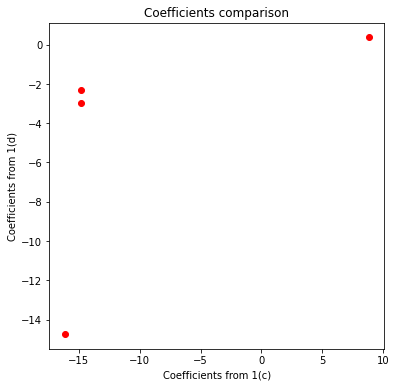

In [23]:
x_axis= [-16.1809,-14.8438,8.8476,-14.8438]
y_axis= [-14.7366,-2.97366,0.3687,-2.3075]
plt.figure(figsize=(6,6))
plt.title("Coefficients comparison")
plt.xlabel("Coefficients from 1(c)")
plt.ylabel("Coefficients from 1(d)")
plt.plot(x_axis,y_axis,'o',color='red')

#### (f) Fitting polynomial features

In [24]:
from sklearn.preprocessing import PolynomialFeatures

In [25]:
ind=X_train_AT.to_numpy().ravel().argsort() # have to convert the dataframe to numpyarray
# and sort the value so that the polynomial graph will be correct
X_train_AT_p =X_train_AT.to_numpy().ravel()[ind].reshape(-1,1)
y_train_p = y_train[ind]
print(X_train_AT_p.shape)
print(y_train_p.shape)

(9568, 1)
(9568,)


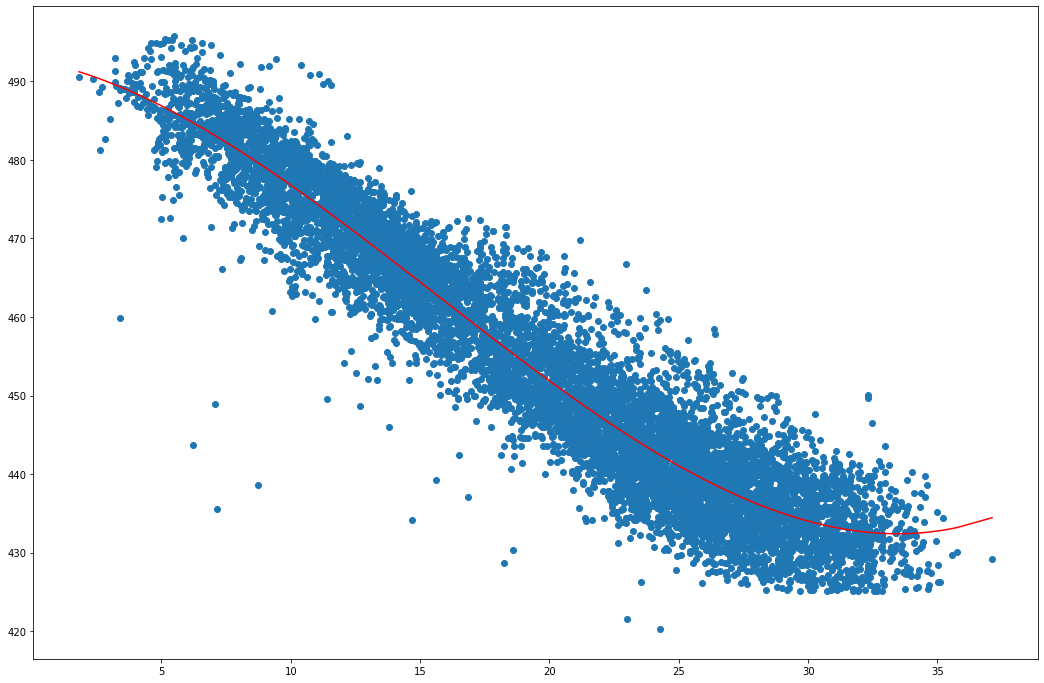

In [26]:
## for predictor AT
poly_features = PolynomialFeatures(3)
X_transform_AT = poly_features.fit_transform(X_train_AT_p)
# fit this to Linear Regressor
#X_transform_AT.shape
poly_model_AT=sm.OLS(y_train_p,X_transform_AT).fit()
y_1 = poly_model_AT.predict(X_transform_AT)
#y_1.shape
plt.figure(figsize=(18,12))
plt.scatter(X_train_AT_p, y_train_p)
#plt.scatter(X_train_AT2, y_train)
#ordered_X_train_AT2 = X_train_AT2.flatten().sort()
plt.plot(X_train_AT_p, y_1,color='r')
#plt.show()

In [27]:
ind_V=X_train_V.to_numpy().ravel().argsort() # have to convert the dataframe to numpyarray
# and sort the value so that the polynomial graph will be correct
X_train_V_p =X_train_V.to_numpy().ravel()[ind_V].reshape(-1,1)
y_train_V_p = y_train[ind_V]

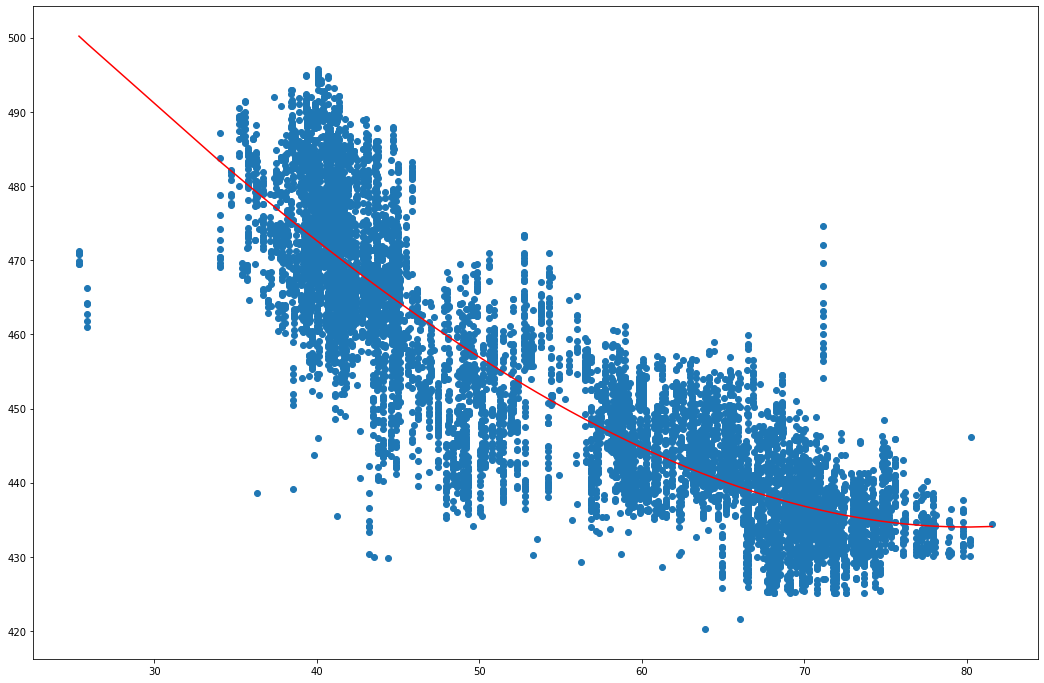

In [28]:
X_transform_V = poly_features.fit_transform(X_train_V_p)
# fit this to sm OLS
poly_model_V=sm.OLS(y_train_V_p,X_transform_V).fit()
y_2 = poly_model_V.predict(X_transform_V)
plt.figure(figsize=(18,12))
plt.scatter(X_train_V_p, y_train_V_p)
plt.plot(X_train_V_p, y_2,color='r')

In [29]:
ind_AP=X_train_AP.to_numpy().ravel().argsort() # have to convert the dataframe to numpyarray
# and sort the value so that the polynomial graph will be correct
X_train_AP_p =X_train_AP.to_numpy().ravel()[ind_AP].reshape(-1,1)
y_train_AP_p = y_train[ind_AP]

In [30]:
X_train_AP_p

array([[ 992.89],
       [ 993.11],
       [ 993.31],
       ...,
       [1033.25],
       [1033.29],
       [1033.3 ]])

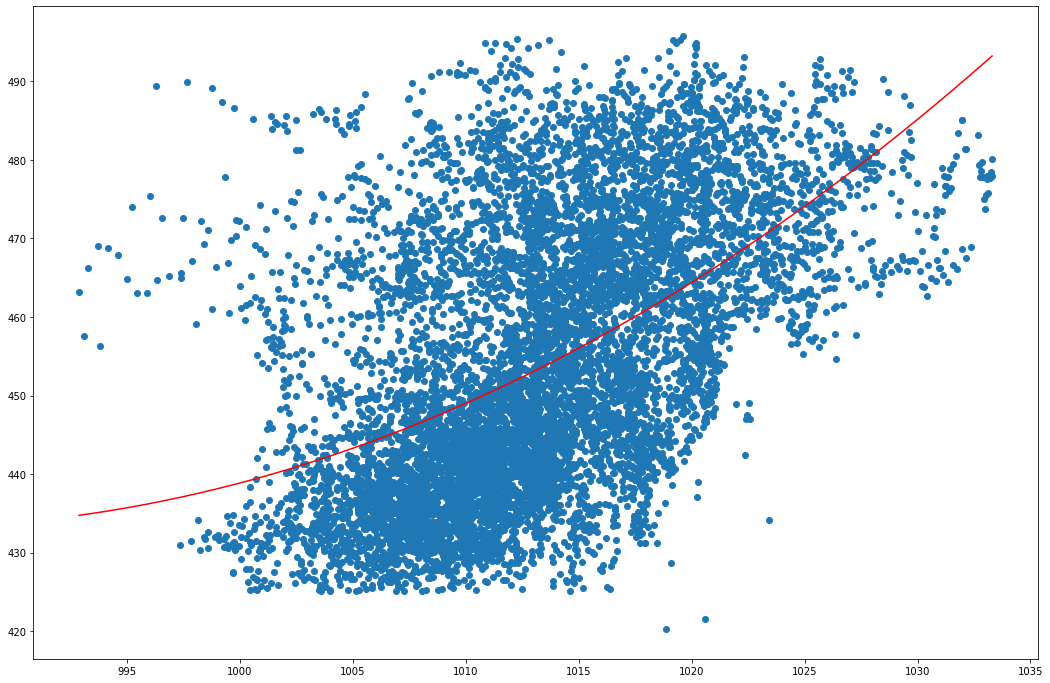

In [31]:
X_transform_AP = poly_features.fit_transform(X_train_AP_p)
# fit this to sm OLS
poly_model_AP=sm.OLS(y_train_AP_p,X_transform_AP).fit()
y_3 = poly_model_AP.predict(X_transform_AP)
plt.figure(figsize=(18,12))
plt.scatter(X_train_AP_p, y_train_AP_p)
plt.plot(X_train_AP_p, y_3,color='r')

In [32]:
ind_RH=X_train_RH.to_numpy().ravel().argsort() # have to convert the dataframe to numpyarray
# and sort the value so that the polynomial graph will be correct
X_train_RH_p =X_train_RH.to_numpy().ravel()[ind_RH].reshape(-1,1)
y_train_RH_p = y_train[ind_RH]

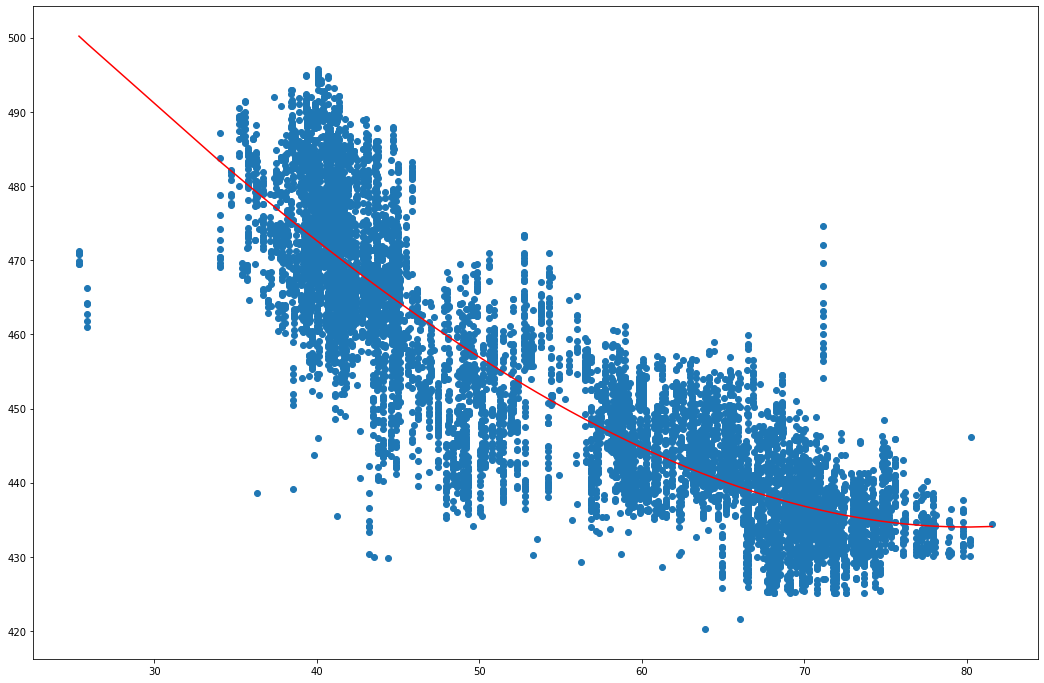

In [33]:
X_transform_RH = poly_features.fit_transform(X_train_RH_p)
# fit this to sm OLS
poly_model_RH = sm.OLS(y_train_RH_p,X_transform_RH).fit()
y_4 = poly_model_RH.predict(X_transform_RH)
plt.figure(figsize=(18,12))
plt.scatter(X_train_RH_p, y_train_RH_p)
plt.plot(X_train_RH_p, y_4,color='r')

##### (g) Significance of the Interaction terms

In [34]:
X_interaction = PolynomialFeatures(2, interaction_only=True,include_bias=False).fit_transform(X_train)

In [35]:
# Creating a new df with interaction terms included
# Reference : https://towardsdatascience.com/interaction-effect-in-multiple-regression-3091a5d0fadd
inter_df =pd.DataFrame(X_interaction, columns=['AT','V','AP','RH','AT:V','AT:AP','AT:RH',
                                              'V:AP','V:RH','AP:RH'])

In [36]:
inter_model = sm.OLS(y_train,inter_df).fit()
print(inter_model.summary())

                                 OLS Regression Results                                
Dep. Variable:                     PE   R-squared (uncentered):                   1.000
Model:                            OLS   Adj. R-squared (uncentered):              1.000
Method:                 Least Squares   F-statistic:                          1.057e+07
Date:                Thu, 22 Sep 2022   Prob (F-statistic):                        0.00
Time:                        17:37:56   Log-Likelihood:                         -27586.
No. Observations:                9568   AIC:                                  5.519e+04
Df Residuals:                    9558   BIC:                                  5.526e+04
Df Model:                          10                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

Interaction terms such as AT:V, AT:RH, V:AP, and AP:RH are significant as their p values are smaller than 0.05.

##### (h) Improve the model with interaction terms & nonlinear association between predictors and response

We have the first model, involving terms AT, V, AP, RH. 

Second being AT, V, AP, RH, AT^2, V^2, AP^2, RH^2,AT*V, AT*AP, AT*RH, V*AP, V*RH, AP*RH.

The other one being the above model but with only significant terms.

In [37]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
X_tts = df.iloc[:,0:4] #reselct the data for better train test split
#X_tts = sm.add_constant(X_tts)
y_tts = df.iloc[:,-1]
X_train_new, X_test_new, y_train_new, y_test_new = train_test_split(X_tts, y_tts, test_size=0.3, random_state=40) 
#randomly choose a number for the random state above.

In [38]:
lm_mul = sm.OLS(y_train_new,X_train_new)
model_mul =lm_mul.fit()
print(model_mul.summary())

                                 OLS Regression Results                                
Dep. Variable:                     PE   R-squared (uncentered):                   1.000
Model:                            OLS   Adj. R-squared (uncentered):              1.000
Method:                 Least Squares   F-statistic:                          1.341e+07
Date:                Thu, 22 Sep 2022   Prob (F-statistic):                        0.00
Time:                        17:37:56   Log-Likelihood:                         -20386.
No. Observations:                6697   AIC:                                  4.078e+04
Df Residuals:                    6693   BIC:                                  4.081e+04
Df Model:                           4                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [39]:
y_pred_mul = model_mul.predict(X_test_new) # the prediction for finding test MSE
mse_mul = mean_squared_error(y_pred_mul, y_test_new)
print("The test MSE of multiple regression is ",mse_mul)
y_pred_mul_train = model_mul.predict(X_train_new) # the prediction for finding train MSE
mse_mul_train = mean_squared_error(y_pred_mul_train, y_train_new)
print("The train MSE of multiple regression is ",mse_mul_train)

The test MSE of multiple regression is  24.785284248754447
The train MSE of multiple regression is  25.796632409388966


In [40]:
# Now we create the second model where all interactions and nonlinear terms are involved.
# reference: https://www.science.smith.edu/~jcrouser/SDS293/labs/lab2-py.html
inter_nonlinear_train =pd.concat([X_train_new,y_train_new],axis=1) # add constants already!
#inter_nonlinear_train
lm_inter_nonlinear = sm.OLS.from_formula('PE ~ np.square(AT)+np.square(V)+np.square(AP)+np.square(RH)+AT*V+AT*AP+AT*RH+V*AP+V*RH+AP*RH',
                            inter_nonlinear_train)
model_lm_inter_nonlinear =lm_inter_nonlinear.fit()
print(model_lm_inter_nonlinear.summary())

                            OLS Regression Results                            
Dep. Variable:                     PE   R-squared:                       0.938
Model:                            OLS   Adj. R-squared:                  0.937
Method:                 Least Squares   F-statistic:                     7169.
Date:                Thu, 22 Sep 2022   Prob (F-statistic):               0.00
Time:                        17:37:56   Log-Likelihood:                -19248.
No. Observations:                6697   AIC:                         3.853e+04
Df Residuals:                    6682   BIC:                         3.863e+04
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept     -7456.4865   1447.309     -5.152

In [41]:
y_pred_inter_nonlinear = model_lm_inter_nonlinear.predict(X_test_new) # the prediction for finding test MSE
mse_inter_nonlinear = mean_squared_error(y_pred_inter_nonlinear, y_test_new)
print("The test MSE of multiple regression with interactions and nonlinear association is ",mse_inter_nonlinear)
y_pred_inter_nonlinear_train = model_lm_inter_nonlinear.predict(X_train_new) # the prediction for finding train MSE
mse_inter_nonlinear_train = mean_squared_error(y_pred_inter_nonlinear_train, y_train_new)
print("The train MSE of multiple regression is ",mse_inter_nonlinear_train)

The test MSE of multiple regression with interactions and nonlinear association is  17.5217419010491
The train MSE of multiple regression is  18.364013906774463


In [42]:
# The insignificant terms are V^2, AT, V, AT:AP, V:AP, V:RH
# We drop these insignificant terms

In [43]:
lm_inter_nonlinear2 = sm.OLS.from_formula('PE ~ np.square(AT)+np.square(AP)+np.square(RH)+AT:V+AT:RH+AP*RH+AP',
                            inter_nonlinear_train)
model_lm_inter_nonlinear2 =lm_inter_nonlinear2.fit()
print(model_lm_inter_nonlinear2.summary())

                            OLS Regression Results                            
Dep. Variable:                     PE   R-squared:                       0.931
Model:                            OLS   Adj. R-squared:                  0.930
Method:                 Least Squares   F-statistic:                 1.120e+04
Date:                Thu, 22 Sep 2022   Prob (F-statistic):               0.00
Time:                        17:37:56   Log-Likelihood:                -19606.
No. Observations:                6697   AIC:                         3.923e+04
Df Residuals:                    6688   BIC:                         3.929e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept     -6000.6010   1128.160     -5.319

In [44]:
y_pred_inter_nonlinear2 = model_lm_inter_nonlinear2.predict(X_test_new) # the prediction for finding test MSE
mse_inter_nonlinear2 = mean_squared_error(y_pred_inter_nonlinear2, y_test_new)
print("The test MSE of multiple regression with interactions and nonlinear association is ",mse_inter_nonlinear2)
y_pred_inter_nonlinear_train2 = model_lm_inter_nonlinear2.predict(X_train_new) # the prediction for finding train MSE
mse_inter_nonlinear_train2 = mean_squared_error(y_pred_inter_nonlinear_train2, y_train_new)
print("The train MSE of multiple regression is ",mse_inter_nonlinear_train2)

The test MSE of multiple regression with interactions and nonlinear association is  19.61793531949235
The train MSE of multiple regression is  20.434444585869603


##### (i) KNN Regression

In [45]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import MinMaxScaler
import math

In [46]:
X_test_new

,AT,V,AP,RH
7683,30.46,66.75,1017.81,54.48
3763,14.73,54.30,1016.75,67.13
9521,27.64,75.60,1017.35,54.78
7691,15.41,42.44,1012.60,86.74
9205,14.32,44.60,1013.85,68.13
...,...,...,...,...
2180,18.95,42.23,1013.01,79.40
7875,12.33,45.51,1016.49,79.20
5745,9.64,39.35,1015.10,91.76
4885,20.07,49.21,1012.34,56.80


In [47]:
# KNN Regression with normalized features
sc_X2 = MinMaxScaler()
X_train_new3 = sc_X2.fit_transform(X_train_new) # we need to normalize this
X_test_new3 = sc_X2.fit_transform(X_test_new) # we need to normalize this

In [48]:
# Define the model
# using the softeware package
test_error=[]
train_error=[]
for i in range (1,101):
    classifier = KNeighborsRegressor(n_neighbors=i)
    classifier.fit(X_train_new3,y_train_new)
    y_predict =classifier.predict(X_test_new3)
    # finding the test error
    test_error.append(math.sqrt(mean_squared_error(y_test_new,y_predict)))
    # finding the training error. Need to pass in the training data again
    y_train_predict=classifier.predict(X_train_new3)
    train_error.append(math.sqrt(mean_squared_error(y_train_new,y_train_predict))) # same thing

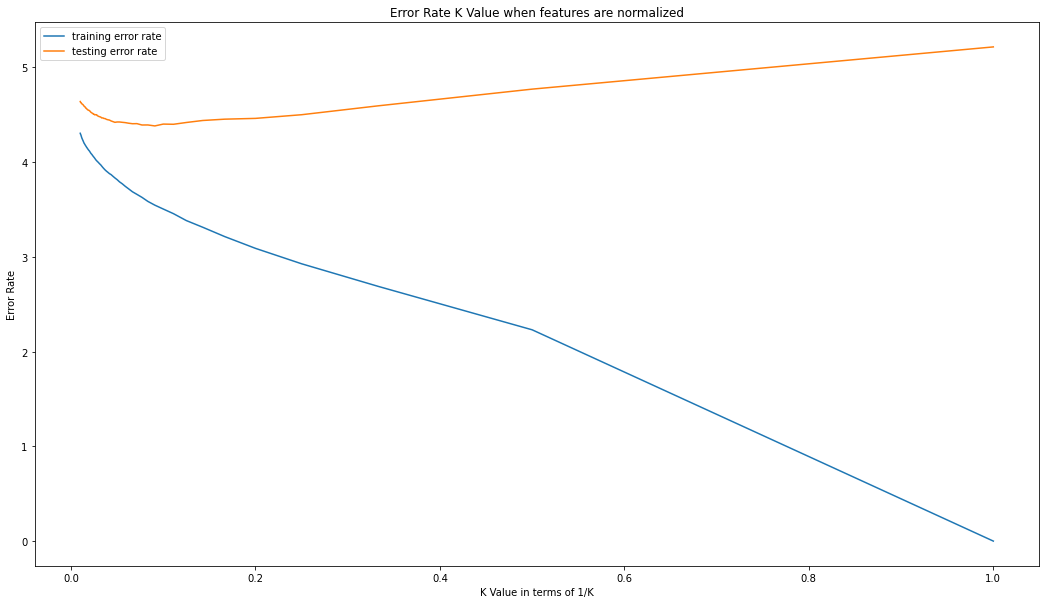

In [49]:
plt.figure(figsize=(18,10))
K_arr = [1/i for i in range (1,101)]
plt.plot(K_arr,train_error,label = "training error rate")
plt.plot(K_arr,test_error,label = "testing error rate")
plt.title('Error Rate K Value when features are normalized')
plt.xlabel('K Value in terms of 1/K')
plt.ylabel('Error Rate')#
plt.legend()
plt.show()

In [50]:
min_test_error_index=test_error.index(min(test_error))
min_train_error_index=train_error.index(min(train_error))
print("If features are normalized, the minimum testing error is: ",min(test_error))
print("If features are normalized, the minimum training error is: ",min(train_error))
print("If features are normalized, the index of best K and the testing error is: ",min_test_error_index)
print("If features are normalized, the best K for the testing error is: ",K_arr[min_test_error_index]**(-1))
print("If features are normalized, the index of best K and the training error is: ",min_train_error_index)
print("If features are normalized, the best K for the training error is: ",K_arr[min_train_error_index]**(-1))

If features are normalized, the minimum testing error is:  4.381164092989281
If features are normalized, the minimum training error is:  0.0
If features are normalized, the index of best K and the testing error is:  10
If features are normalized, the best K for the testing error is:  11.0
If features are normalized, the index of best K and the training error is:  0
If features are normalized, the best K for the training error is:  1.0


In [51]:
# KNN Regression with raw features
test_error_r=[]
train_error_r=[]
for i in range (1,101):
    classifier_r = KNeighborsRegressor(n_neighbors=i)
    classifier_r.fit(X_train_new,y_train_new)
    y_predict_r =classifier_r.predict(X_test_new)
    # finding the test error
    test_error_r.append(math.sqrt(mean_squared_error(y_test_new,y_predict_r)))
    # finding the training error. Need to pass in the training data again
    y_train_predict_r=classifier_r.predict(X_train_new)
    train_error_r.append(math.sqrt(mean_squared_error(y_train_new,y_train_predict_r))) # same thing

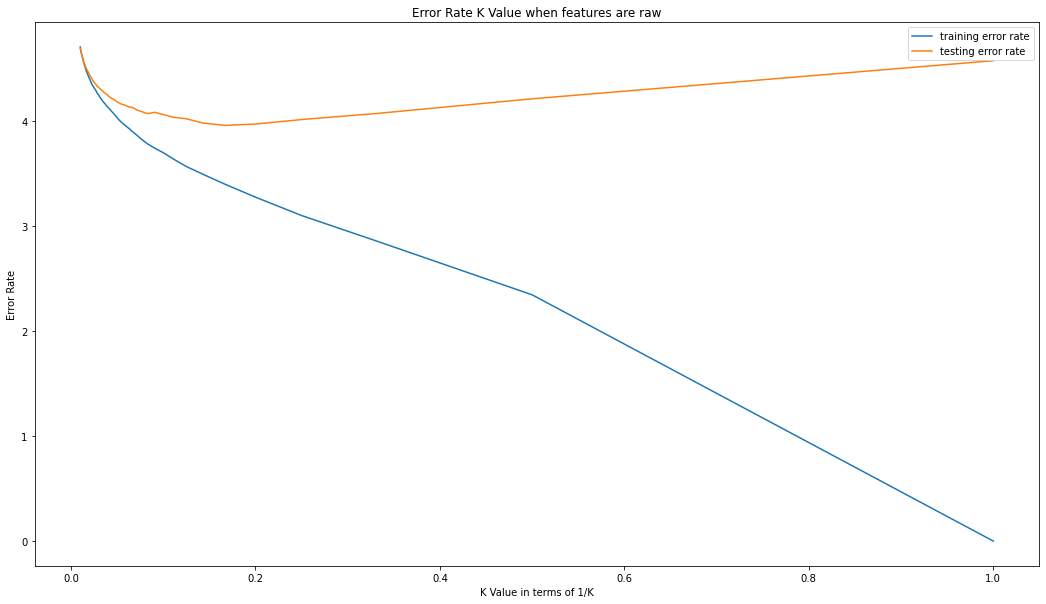

In [52]:
plt.figure(figsize=(18,10))
plt.plot(K_arr,train_error_r,label = "training error rate")
plt.plot(K_arr,test_error_r,label = "testing error rate")
plt.title('Error Rate K Value when features are raw')
plt.xlabel('K Value in terms of 1/K')
plt.ylabel('Error Rate')#
plt.legend()
plt.show()

In [53]:
min_test_error_index_r = test_error_r.index(min(test_error_r))
min_train_error_index_r = train_error_r.index(min(train_error_r))
print("If features are raw, the minimum testing error is: ",min(test_error_r))
print("If features are raw, the minimum training error is: ",min(train_error_r))
print("If features are raw, the index of best K and the testing error is: ",min_test_error_index_r)
print("If features are raw, the best K for the testing error is: ",K_arr[min_test_error_index_r]**(-1))
print("If features are raw, the index of best K and the training error is: ",min_train_error_index_r)
print("If features are raw, the best K for the training error is: ",K_arr[min_train_error_index_r]**(-1))

If features are raw, the minimum testing error is:  3.953314541471564
If features are raw, the minimum training error is:  0.0
If features are raw, the index of best K and the testing error is:  5
If features are raw, the best K for the testing error is:  6.0
If features are raw, the index of best K and the training error is:  0
If features are raw, the best K for the training error is:  1.0


##### (j) Comparison between the KNN Regression and the LInear Regression model

My results of KNN Regression training or testing errors, no matter the features are normalized or raw, are lower/better than the linear regression model's smallest training or testing error.

#### ISLR 2.4.1 Flexible vs inflexible method

1(a) Better. When sample size is large and the number of predictors p is small, a flexible one is better since it will have a better fit with many training points.

1(b) Worse. Because a flexible method may overfit here with many predictors and few observations. Should choose an inflexible method.

1(c) Better. If the relationship between predictors and response is highly non-linear, a more flexible method would outperform an inflexible one since we have more degree of freedom/independent variables. If we have a lot of training observations, the error will be lower if we use the flexible one here than using an inflexible method.

1(d) Worse. When the variance of the error terms is high, that means an inflexible method will be better here. Otherwise, the variance will be even higher if we use a flexible method.

#### ISLR 2.4.7 KNN

7(a) Euclidean Distance{observation 1:3}, {observation 2: 2}, {observation 3: 3.16 (sqrt of 10)}, {observation 4: 2.23 (sqrt of 5)}, {observation 5: 1.41 (sqrt of 2)}, {observation 6: 1.73 (sqrt of 3)}

7(b) Prediction with K=1 is Green. Because the closest one point has a result of Green.

7(c) Prediction with K=3 is Red. Because out of the three closest points, 2 are red and 1 is green.

7(d) Small. Because we want the Bayes decision boundaryto be non-linear/flexible. When K is large, the Bayes decision boundary will be more inflexible/more linear.